<a href="https://colab.research.google.com/github/Lucca465/machine_learning_discover_house_prices/blob/main/machine_learning_discover_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este projeto tem como propósito analisar a base de dados House Prices para extrair insights valiosos sobre a correlação entre suas variáveis. Além disso, será desenvolvido um modelo de Machine Learning capaz de prever o preço de imóveis com base em atributos como número de quartos, banheiros, andares, metragem, nota avaliativa, entre outros.

# Configuração inicial

**Importação das bibliotecas**

Para a análise e visualização dos dados, utilizamos as seguintes bibliotecas:

In [1]:
import pandas as pd  # Manipulação e análise de dados
import numpy as np  # Operações numéricas e tratamento de dados
import seaborn as sns  # Visualização de dados estatísticos
import matplotlib.pyplot as plt  # Criação de gráficos estáticos
import plotly.express as px  # Visualizações interativas

**Carregamento da Base de Dados**

Para importar os dados, utilizamos a biblioteca pandas, que permite manipular e analisar conjuntos de dados de forma eficiente. Vamos carregar a base de dados salva no meu diretório do github:

In [2]:
url = 'https://raw.githubusercontent.com/Lucca465/machine_learning_discover_house_price/refs/heads/main/database/house_prices.csv'
house_prices = pd.read_csv(url)
house_prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# Análise inicial

Para uma primeira análise, podemos utilizar algumas funções do pandas:

In [3]:
# Exibir informações gerais sobre o dataset, como tipos de dados e valores nulos
house_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Podemos observar que a maioria das variáveis presentes na base de dados é numérica.

E não contém valores nulos.

In [4]:
# Resumo estatístico das variáveis numéricas
house_prices.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Para não acontecer o erro no momento da criação das correlações, precisamos tratar o campo data da seguinte maneira:

# Visualização dos dados

In [5]:
house_prices['date'] = pd.to_datetime(house_prices['date'], format='%Y%m%dT%H%M%S', errors='coerce')

In [6]:
house_prices.head(1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.0,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650


Agora, podemos analisar a correlação entre as variáveis utilizando o código abaixo. Nesse contexto, quanto mais próximo de 1, mais forte é a correlação positiva entre as variáveis. Por outro lado, valores próximos de -1 indicam uma correlação inversa.

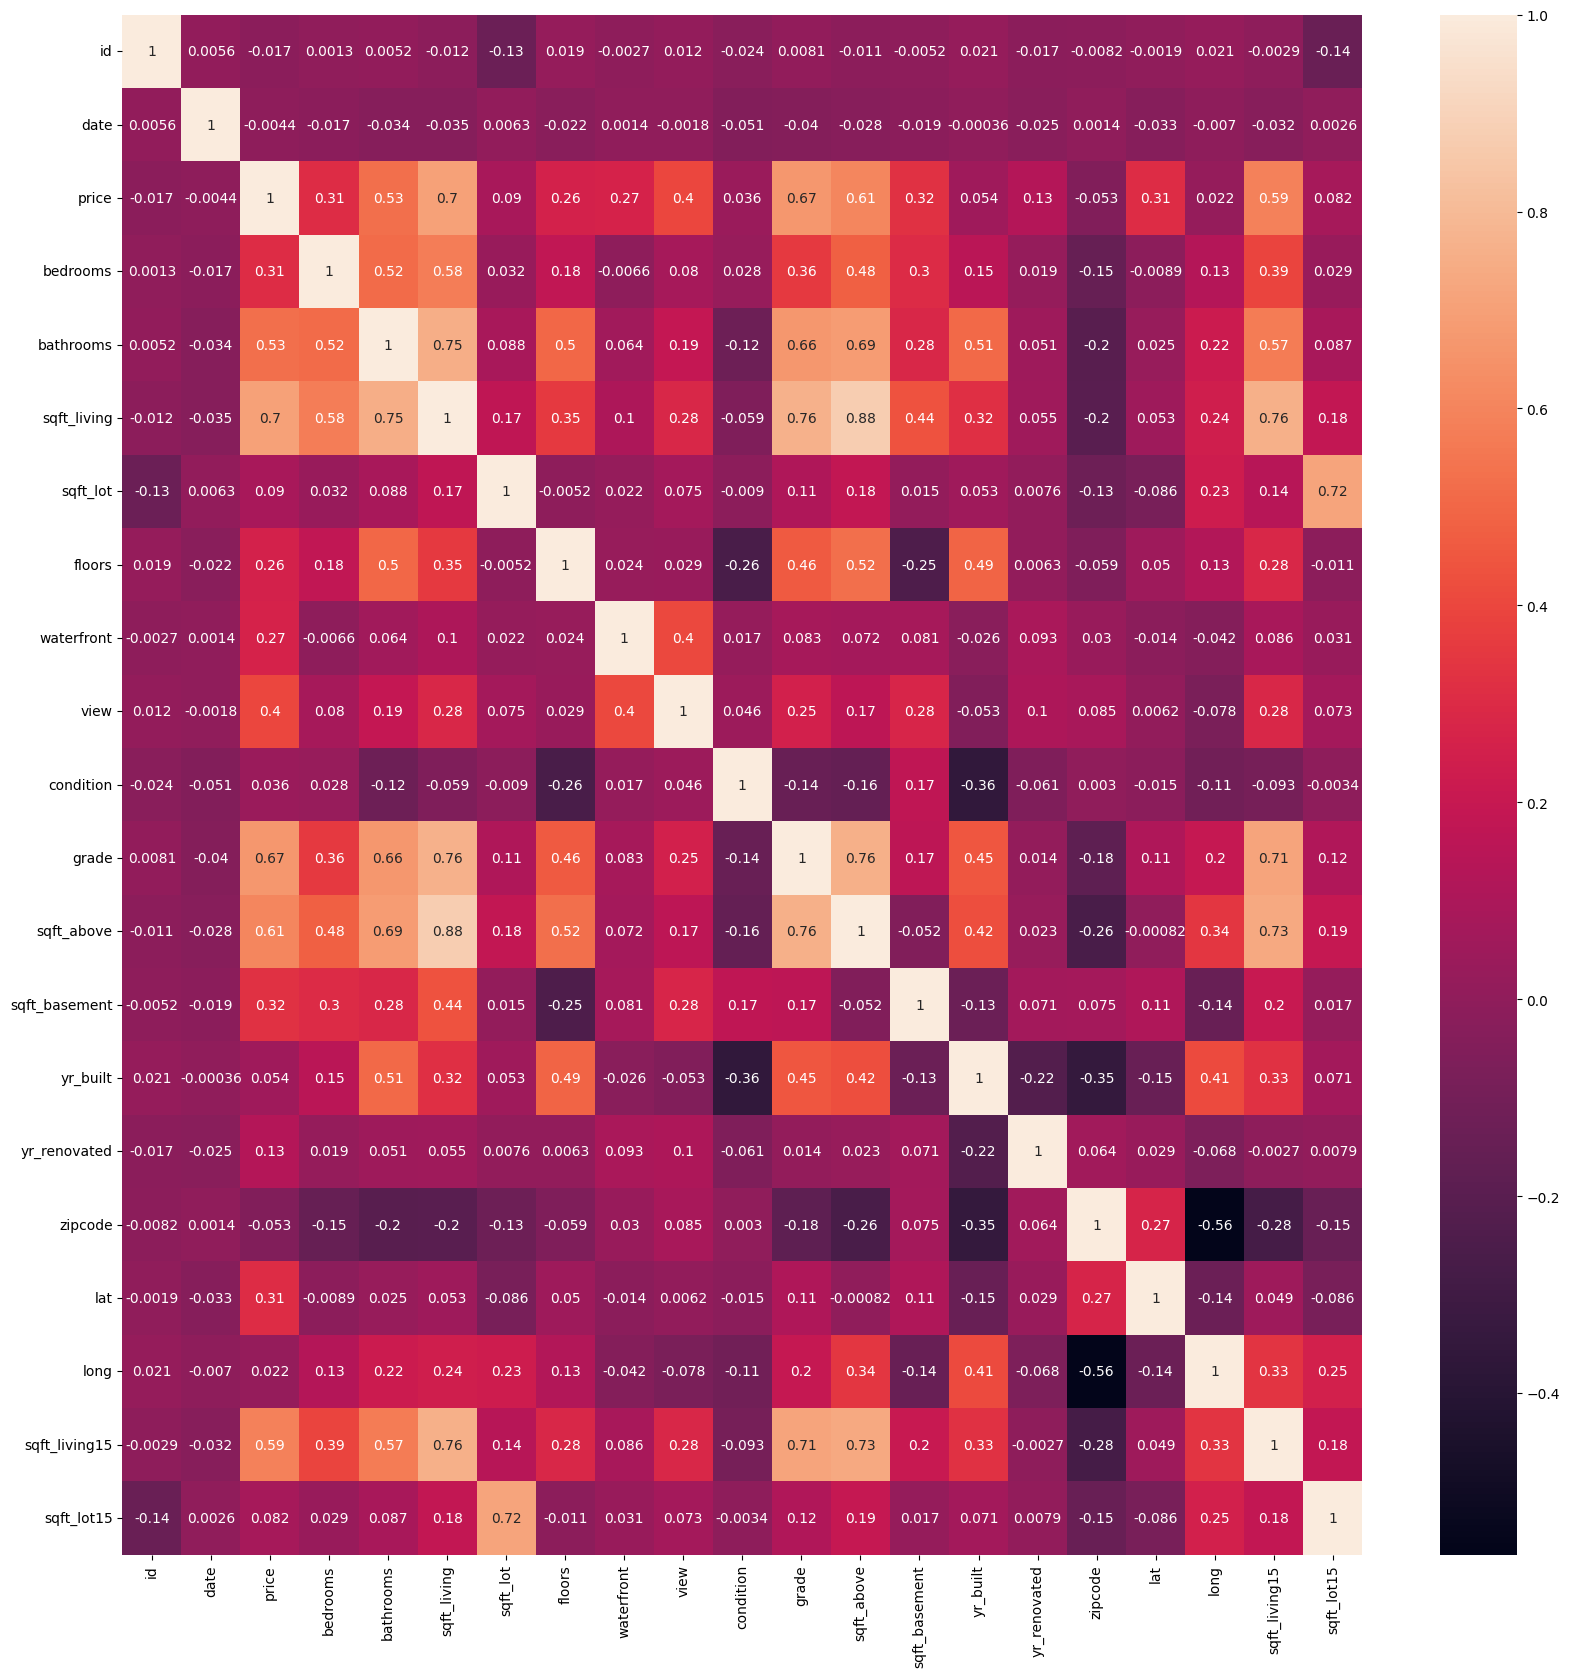

In [7]:
# No github não aparece o gráfico, então ele irá ser anexado na branch main ou vc poderá acessar clicando no link do Google Colab
figura = plt.figure(figsize=(20, 20))
sns.heatmap(house_prices.corr(), annot=True);

Analisando as correlações com a variável classe, podemos dizer que a variável sqft_living (área útil de pés quadrados da casa) é a que mais impacta no preço da casa. Em seguida vem a nota avaliativa, sqft_above (outra metragem da casa) e quantidade de banheiros.

# Divisão entre previsores e classe

Para treinar um modelo de aprendizado de máquina, é importante definir quais serão as variáveis independentes (previsores) e a variável dependente (classe).

* Variáveis de Previsores (X): são as colunas que utilizaremos para fazer a previsão.
* Variável de Classe (Y): é a coluna que contém o valor que queremos prever, ou seja, o preço.

In [8]:
X_house = house_prices.iloc[:, 3:19].values
X_house

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03, ...,  9.81780e+04,
         4.75112e+01, -1.22257e+02],
       [ 3.00000e+00,  2.25000e+00,  2.57000e+03, ...,  9.81250e+04,
         4.77210e+01, -1.22319e+02],
       [ 2.00000e+00,  1.00000e+00,  7.70000e+02, ...,  9.80280e+04,
         4.77379e+01, -1.22233e+02],
       ...,
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75944e+01, -1.22299e+02],
       [ 3.00000e+00,  2.50000e+00,  1.60000e+03, ...,  9.80270e+04,
         4.75345e+01, -1.22069e+02],
       [ 2.00000e+00,  7.50000e-01,  1.02000e+03, ...,  9.81440e+04,
         4.75941e+01, -1.22299e+02]])

In [9]:
y_house = house_prices.iloc[:, 2].values
y_house

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

# Divisão da base em treinamento e teste

Uma etapa essencial no desenvolvimento de modelos de aprendizado de máquina é dividir a base de dados em dois subconjuntos: um para treinamento e outro para teste. A divisão permite que o modelo aprenda com uma parte dos dados (treinamento) e seja avaliado com outra parte que não foi utilizada no processo de treinamento (teste).

Vamos adotar a seguinte estratégia:


*   70% da base será usada para o treinamento do modelo. Isso permitirá que o algoritmo aprenda a identificar padrões nos dados preditivos e associe-os ao resultado da variável classe (price).
*   25% da base será reservada para teste. Essa parte será usada para avaliar a performance do modelo, verificando sua capacidade de generalizar e fazer previsões precisas com dados que não foram vistos durante o treinamento.



Vamos usar o train_test_split da biblioteca scikit-learn para dividir a base de dados:

In [10]:
from sklearn.model_selection import train_test_split
X_house_train, X_house_test, y_house_train, y_house_test = train_test_split(X_house, y_house, test_size=0.3, random_state=0)

A divisão com random_state=0 garante que a divisão seja reproduzível, ou seja, ao rodar o código novamente, sempre teremos a mesma divisão.

In [11]:
X_house_train.shape, y_house_train.shape

((15129, 16), (15129,))

In [12]:
X_house_test.shape, y_house_test.shape

((6484, 16), (6484,))

# Escalonamento de valores

O escalonamento dos dados é uma etapa crucial no pré-processamento, pois muitos algoritmos de aprendizado de máquina são sensíveis à escala das variáveis. Se as variáveis não tiverem a mesma escala, o algoritmo pode atribuir mais importância a uma variável com valores mais altos, como é o caso da sqft_living, que tende a ser maior do que a quantidade de quantos. Para garantir que todas as variáveis sejam tratadas de forma igual, é necessário realizar o escalonamento. Após a base passar pelo treinamento e fazer a previões dos dados, podemos inverter o escalocamento para verificarmos os valores corretos.

**Padronização (Z-Score):**
A fórmula é:

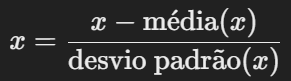

In [13]:
from sklearn.preprocessing import StandardScaler
scaler_x_house = StandardScaler()
X_house_train_scaled = scaler_x_house.fit_transform(X_house_train)
scaler_y_house = StandardScaler()
y_house_train_scaled = scaler_y_house.fit_transform(y_house_train.reshape(-1,1))

In [14]:
X_house_train_scaled.shape, y_house_train_scaled.shape

((15129, 16), (15129, 1))

In [15]:
X_house_train_scaled

array([[ 0.67170039, -0.79711466, -0.74522967, ...,  1.03727271,
         1.17348387, -0.83797629],
       [-0.38696772, -0.79711466, -0.68028398, ...,  1.03727271,
         1.53476983, -0.95879989],
       [ 1.7303685 ,  0.82292131,  0.84593978, ..., -0.48008241,
         1.07108346,  0.78248142],
       ...,
       [-0.38696772,  0.17490692,  0.30472568, ..., -0.66741021,
        -1.25528083,  0.3986888 ],
       [ 0.67170039, -0.14910028,  0.31554996, ..., -1.43545415,
        -1.99443873, -0.46129094],
       [ 0.67170039,  0.17490692,  0.32637425, ..., -1.3043247 ,
         0.38168351,  0.66876509]])

In [16]:
y_house_train_scaled

array([[-0.38454326],
       [-0.3024967 ],
       [ 0.49062008],
       ...,
       [-0.29976181],
       [-0.35445952],
       [ 0.43564888]])

In [17]:
X_house_test_scaled = scaler_x_house.transform(X_house_test)
y_house_test_scaled = scaler_y_house.transform(y_house_test.reshape(-1,1))

In [18]:
X_house_test_scaled.shape, y_house_test_scaled.shape

((6484, 16), (6484, 1))

In [19]:
X_house_test_scaled

array([[-1.44563583, -0.79711466, -0.70193254, ...,  0.88741047,
         1.17204161, -0.53947092],
       [ 0.67170039,  1.47093569,  2.80513482, ..., -1.36052304,
         0.54321655,  0.35604518],
       [-1.44563583, -1.76913625, -0.69110826, ...,  0.55022044,
         0.80065984, -1.06540895],
       ...,
       [-0.38696772,  0.49891411,  0.07741576, ..., -0.36768574,
        -0.78077751,  0.88909048],
       [-0.38696772, -0.47310747, -0.64781113, ..., -0.854738  ,
        -1.39878563, -0.46839822],
       [-0.38696772, -1.44512905, -0.82099964, ...,  0.26922876,
        -1.78603226,  0.22100704]])

In [20]:
y_house_test_scaled

array([[-0.66623646],
       [ 2.83715179],
       [ 0.05878167],
       ...,
       [-0.43924097],
       [-0.74554814],
       [-0.91511104]])

# Redes neurais artificiais

Para fazer a previsão da nossa base de dados de classificação, vamos utilizar o algoritmo de redes neurais, uma poderosa técnica de aprendizado de máquina que simula o funcionamento do cérebro humano para reconhecer padrões e fazer previsões.

Quando aplicadas a tarefas de regressão, elas aprendem a mapear relações entre variáveis de entrada e saída para prever valores contínuos.

In [21]:
from sklearn.neural_network import MLPRegressor

O MLPRegressor (Multi-layer Perceptron Regressor) é um modelo de rede neural artificial (ANN) disponível no Scikit-Learn, utilizado para resolver problemas de regressão. Ele pertence à classe dos perceptrons multicamadas (MLP) e aprende relações entre variáveis por meio de camadas de neurônios conectados.

O MLPRegressor será configurado com os seguintes parâmetros:
* max_iter = 1000: O número máximo de iterações (épocas) para o treinamento.
* hidden_layer_sizes=(9,9): A rede terá duas camadas ocultas, cada uma com 9 neurônios.

In [57]:
regressor_rna_house = MLPRegressor(max_iter=1000, hidden_layer_sizes=(9,9))
regressor_rna_house.fit(X_house_train_scaled, y_house_train_scaled.ravel())

MLPRegressor(hidden_layer_sizes=(9, 9), max_iter=1000)

OBS: pode ter pequenas diferenças a cada vez que rodamos o camando da redes neurais

A base de treinamento chegou com a porcentagem de acerto de:


In [58]:
regressor_rna_house.score(X_house_train_scaled, y_house_train_scaled)

0.8976177234611046

A base de teste chegou com a porcentagem de acerto de:

In [59]:
regressor_rna_house.score(X_house_test_scaled, y_house_test_scaled)

0.8842630768230324

Rodando as redes neurais podemos usar o predict para fazer as precisões do dados.

In [60]:
previsoes = regressor_rna_house.predict(X_house_test_scaled)
previsoes

array([-0.58953515,  3.08460998, -0.03534792, ..., -0.51884927,
       -0.85318787, -0.86458329])

Agora, para podermos verificar o valor verdadeiro antes da escolonagem, vamos utilizar o inverse_transform

In [61]:
y_house_test_inverse = scaler_y_house.inverse_transform(y_house_test_scaled)
previsoes_inverse = scaler_y_house.inverse_transform(previsoes.reshape(-1,1))

In [62]:
y_house_test_inverse

array([[ 297000.],
       [1578000.],
       [ 562100.],
       ...,
       [ 380000.],
       [ 268000.],
       [ 206000.]])

In [63]:
previsoes_inverse

array([[ 325045.53132163],
       [1668482.10536911],
       [ 527681.88848891],
       ...,
       [ 350891.54010602],
       [ 228641.96133861],
       [ 224475.2689406 ]])

Uma das métricas que utilizaremos para avaliar o desempenho do modelo de Machine Learning é o Mean Absolute Error.
A métrica mede a diferença média absoluta entre os preços reais das casas e as previsões feitas pelo algoritmo. Em outras palavras, ele indica, em média, o quanto o modelo está errando nas previsões, sem considerar a direção do erro (se está superestimando ou subestimando).

In [64]:
from sklearn.metrics import mean_absolute_error

In [65]:
mean_absolute_error(y_house_test_inverse, previsoes_inverse)

73687.27220764433

Quando nosso algoritmo for prever uma casa, pode ser que ele erre em média de $73.687,48 doláres.